darts-package built on 08/10/2020 18:32:54 by root@runner-Gd7HMPkj-project-1205-concurrent-0 from 180bd2c
Building connection list...
Start simulation
Finish simulation


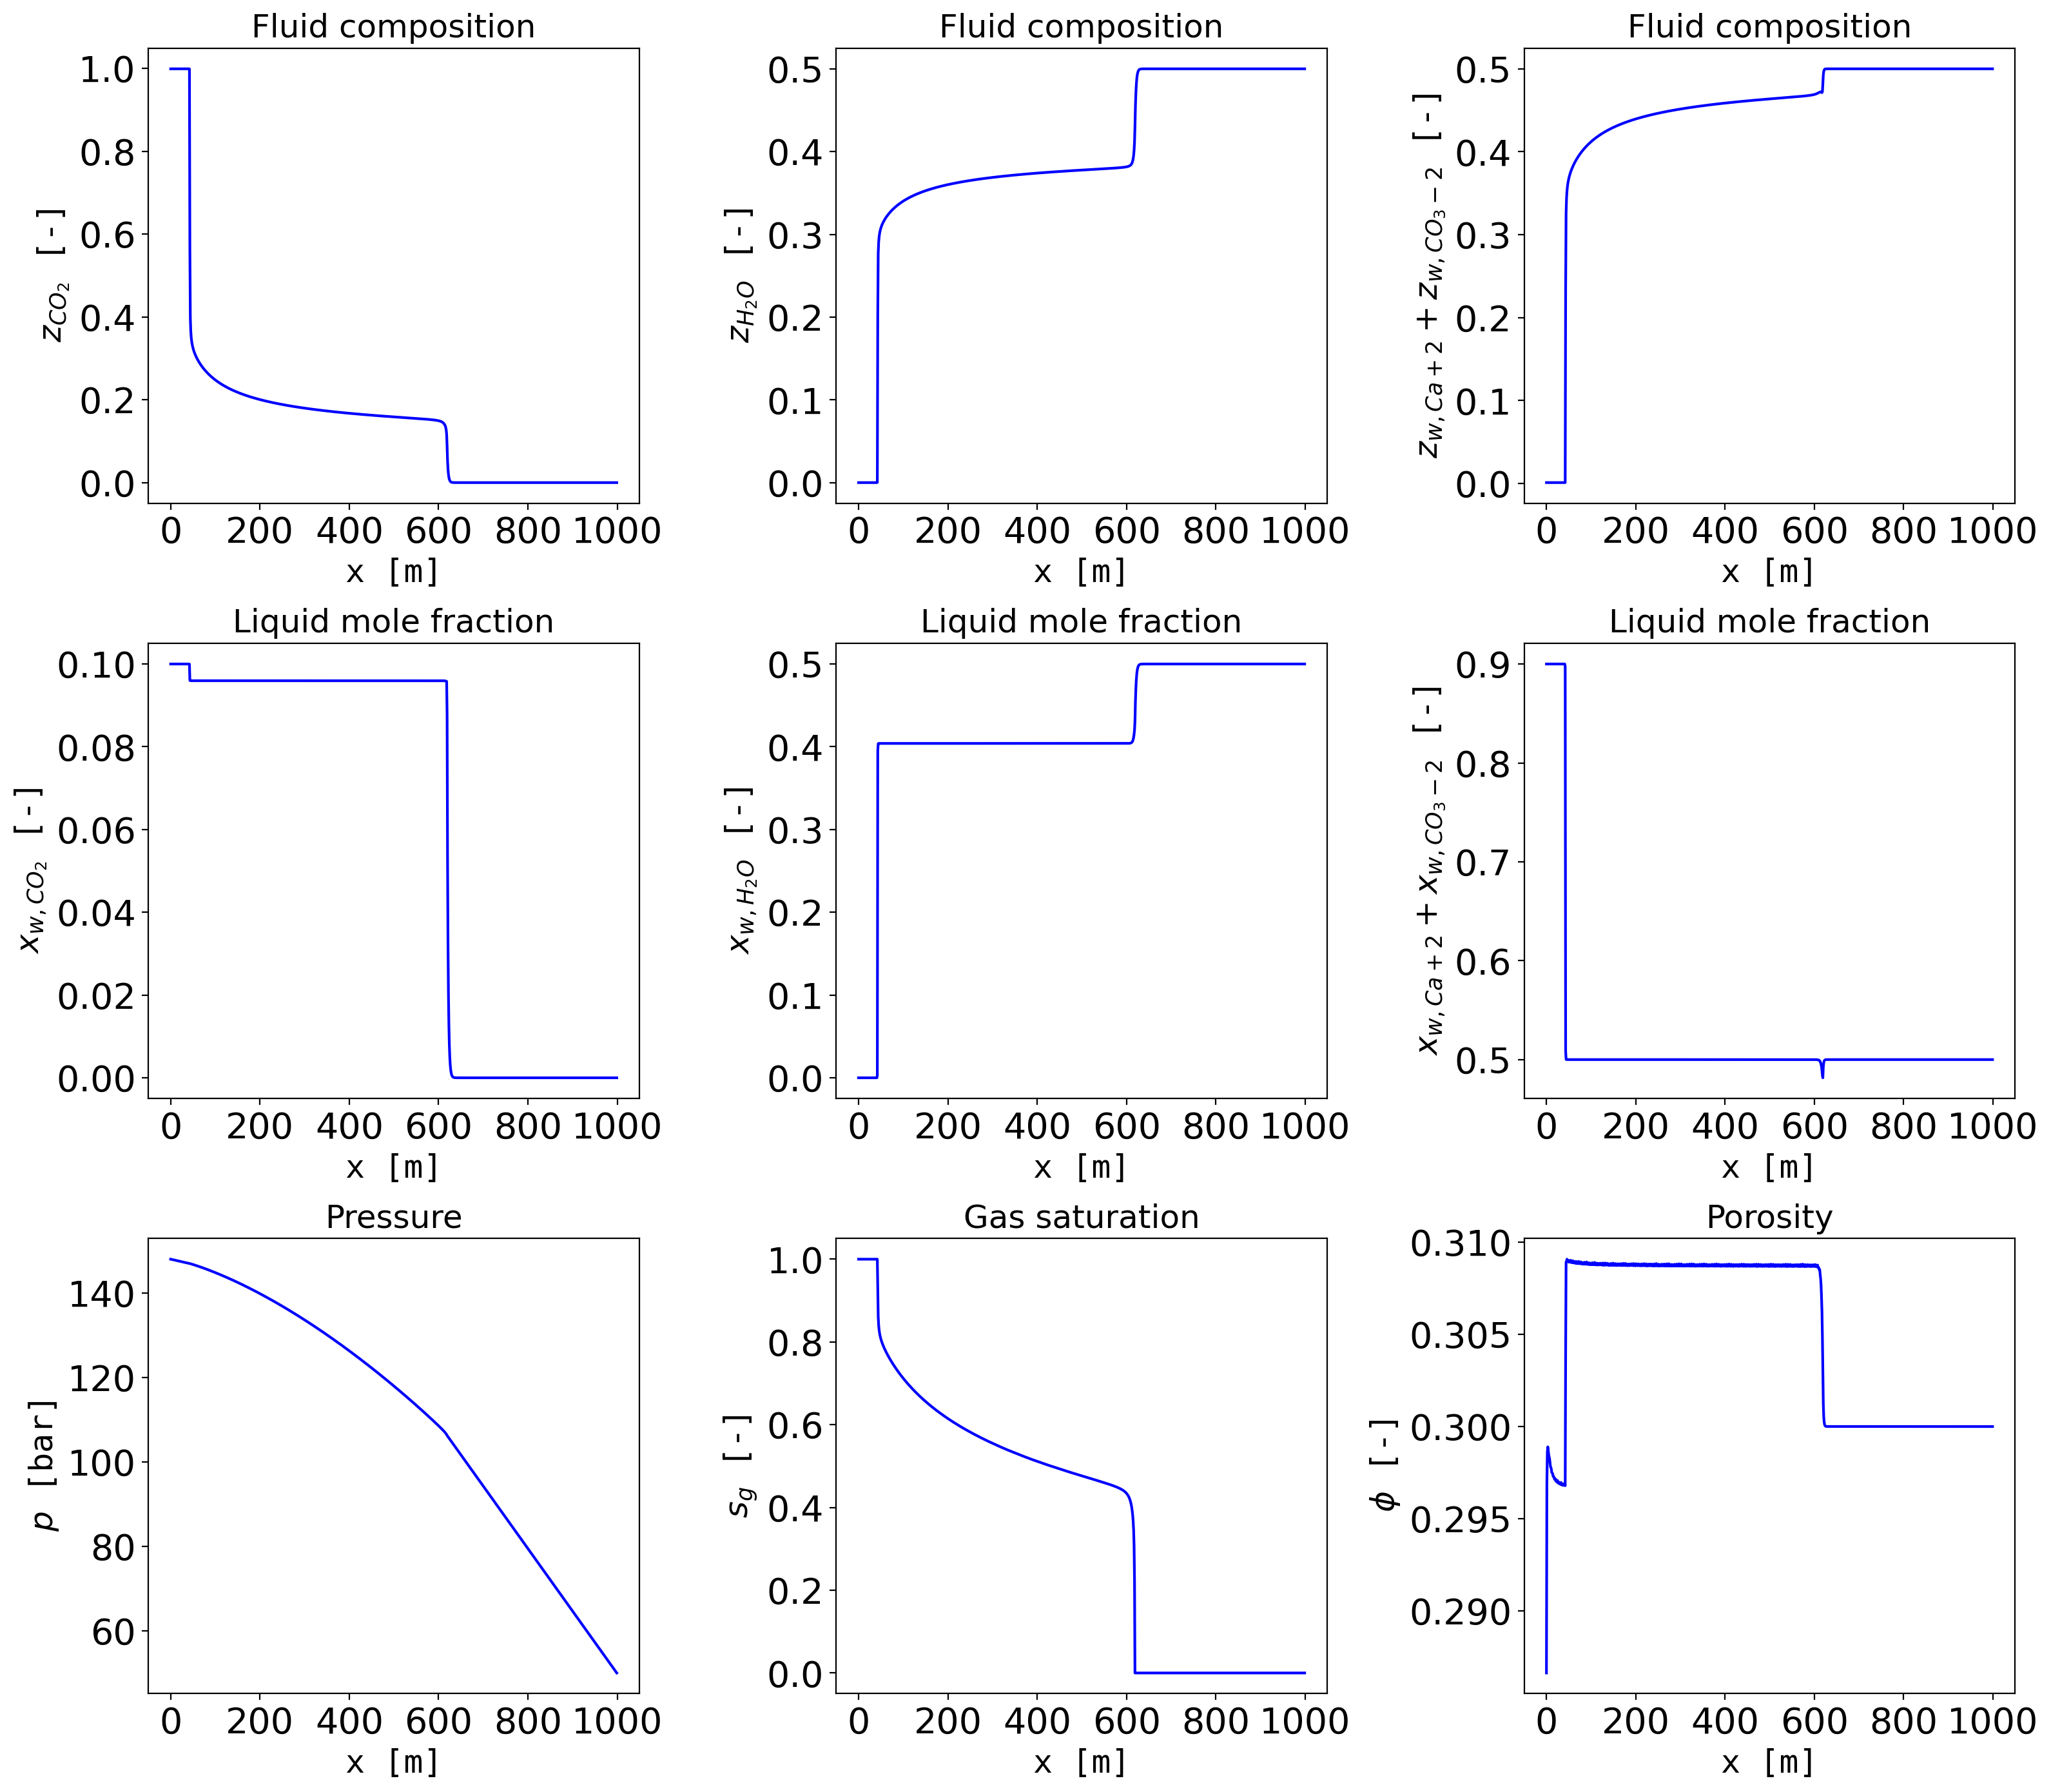

In [2]:
import numpy as np
import pandas as pd
from model import Model
from darts.engines import redirect_darts_output

redirect_darts_output('run.log')
n = Model()
n.init()

# Make arrays for report-steps over time:
sim_time = 1000
dt = 1
n.params.max_ts = dt

nc = 4
nb = 1000

Xn = np.array(n.physics.engine.X, copy=True)
initial_sol = Xn[:nb * nc]
intermed_sol = np.zeros((nb * nc,))
final_sol = np.zeros((nb * nc,))

print("Start simulation")
n.run(sim_time)
print("Finish simulation")
n.print_stat()
Xn = np.array(n.physics.engine.X, copy=True)

time_data = pd.DataFrame.from_dict(n.physics.engine.time_data)
time_data.to_pickle("darts_time_data.pkl")
n.save_restart_data()
writer = pd.ExcelWriter('time_data.xlsx')
time_data.to_excel(writer, 'Sheet1')
writer.save()

n.print_and_plot('sim_data_final.txt')